In [48]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## A. Load Datasets dan Data Cleaning


## Dataset Movie
- Dataset: [imdb_1972-2019](https://www.kaggle.com/satkarjain/imdb-movie-19722019)

In [49]:
df = pd.read_csv('imdb_1972-2019.csv')
print(len(df))
df.head()


5834


,Unnamed: 0,Title,Year,Rating,Metascore,Votes,Description,Genre,Runtime (Minutes),Revenue (Millions),Actors,Director
0,0,Avengers: Endgame,2019,8.5,78.0,648248,After the devastating events of Avengers: ...,"Action, Adventure, Drama",181,858.37,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...","Anthony Russo, Joe Russo"
1,1,Spider-Man: Far from Home,2019,7.6,69.0,255849,Following the events of Avengers: Endgame ...,"Action, Adventure, Sci-Fi",129,388.53,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...",Jon Watts
2,2,Toy Story 4,2019,7.9,84.0,146740,"When a new toy called ""Forky"" joins Woody ...","Animation, Adventure, Comedy",100,433.03,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale",Josh Cooley
3,3,Jumanji: The Next Level,2019,7.0,58.0,63856,"In Jumanji: The Next Level, the gang is ba...","Action, Adventure, Comedy",123,0.00,"Dwayne Johnson, Jack Black, Kevin Hart, Karen ...",Jake Kasdan
4,4,The Lighthouse,2019,7.8,83.0,50595,Two lighthouse keepers try to maintain the...,"Drama, Fantasy, Horror",109,0.43,"Robert Pattinson, Willem Dafoe, Valeriia Karaman",Robert Eggers


In [50]:
df.describe()

,Unnamed: 0,Year,Rating,Metascore,Votes,Runtime (Minutes),Revenue (Millions)
count,5834.000000,5834.000000,5834.000000,5805.000000,5.834000e+03,5834.000000,5742.000000
mean,2402.793109,2001.529825,6.435447,54.651852,8.999182e+04,106.948063,40.102442
std,1631.109026,11.151462,0.986503,17.759436,1.590597e+05,17.852748,65.781920
min,0.000000,1972.000000,1.500000,1.000000,2.900000e+01,48.000000,0.000000
25%,909.250000,1995.000000,5.900000,42.000000,1.135550e+04,94.000000,1.920000
50%,2367.500000,2004.000000,6.500000,55.000000,3.515200e+04,104.000000,17.315000
75%,3825.750000,2010.000000,7.100000,67.000000,9.656950e+04,116.000000,49.865000
max,5284.000000,2019.000000,9.300000,99.000000,2.182098e+06,317.000000,936.660000


### Melihat columns yg tersedia

In [51]:
df.columns.values

array(['Unnamed: 0', 'Title', 'Year', 'Rating', 'Metascore', 'Votes',
       'Description', 'Genre', 'Runtime (Minutes)', 'Revenue (Millions)',
       'Actors', 'Director'], dtype=object)

### Mengecek 'NaN / null value' pada dataset

In [52]:
df.isnull().sum()

Unnamed: 0             0
Title                  0
Year                   0
Rating                 0
Metascore             29
Votes                  0
Description            0
Genre                  0
Runtime (Minutes)      0
Revenue (Millions)    92
Actors                 0
Director               0
dtype: int64

### Membersihkan 'NaN / null value'

In [53]:
df = df.dropna()
print(len(df))

5735


In [54]:
df.isnull().sum()

Unnamed: 0            0
Title                 0
Year                  0
Rating                0
Metascore             0
Votes                 0
Description           0
Genre                 0
Runtime (Minutes)     0
Revenue (Millions)    0
Actors                0
Director              0
dtype: int64

### Reset index agar mudah untuk melakukan skor cosine

In [55]:
df.reset_index(inplace=True)

### Melakukan labeling pada Rating dan Year

In [56]:
# Membuat label untuk 'Rating' dan 'Year'
pd.options.mode.chained_assignment = None  # default='warn'

df['Its'] = 'Good'
df['Period'] = 'y'

df['Its'][df['Rating']>=9] = 'Excellent'
df['Its'][(df['Rating']<9) & (df['Rating']>=8)] = 'Very Good'
df['Its'][(df['Rating']<8) & (df['Rating']>=7)] = 'Good'
df['Its'][(df['Rating']<7) & (df['Rating']>=6)] = 'Decent'
df['Its'][(df['Rating']<6) & (df['Rating']>=5)] = 'Poor'
df['Its'][df['Rating']<5] = 'Bad'

df['Period'][df['Year']>=2019] = '2019 <'
df['Period'][(df['Year']<2019) & (df['Year']>=2015)] = '2015-2019'
df['Period'][(df['Year']<2015) & (df['Year']>=2011)] = '2011-2015'
df['Period'][(df['Year']<2011) & (df['Year']>=2007)] = '2007-2011'
df['Period'][(df['Year']<2007) & (df['Year']>=2003)] = '2003-2007'
df['Period'][df['Year']<2003] = '< 2003'

# df[df['Its']=='Excellent']

### Export dataset menjadi file .csv

In [57]:
df.to_csv('DataMovie.csv', index=False)

## EDA

Exploratory Data Analysis

Text(0, 0.5, 'Total Movie')

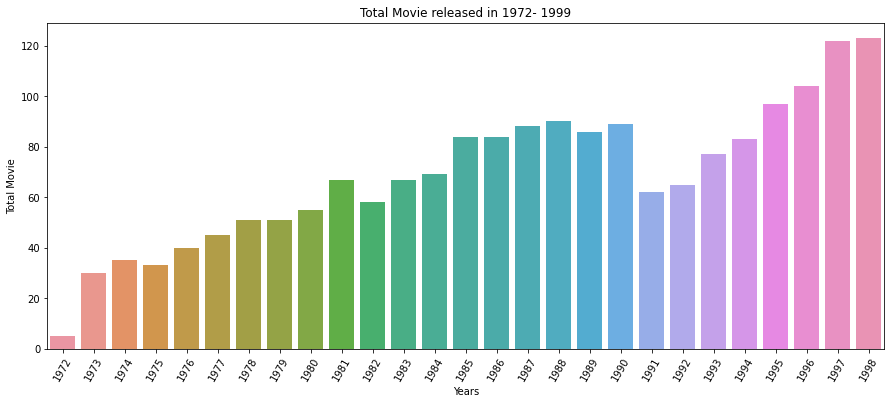

In [58]:
years = df.groupby(df['Year']).agg('count')['Unnamed: 0'].rename('count')

Year = 1999
year1 = years[years.index < Year]

plt.figure(figsize=(15,6))
sb.barplot(y=year1, x=year1.index)
plt.title(f'Total Movie released in 1972- {Year}')
plt.xticks(rotation=60)
plt.xlabel('Years')
plt.ylabel('Total Movie')

Text(0, 0.5, 'Total Movie')

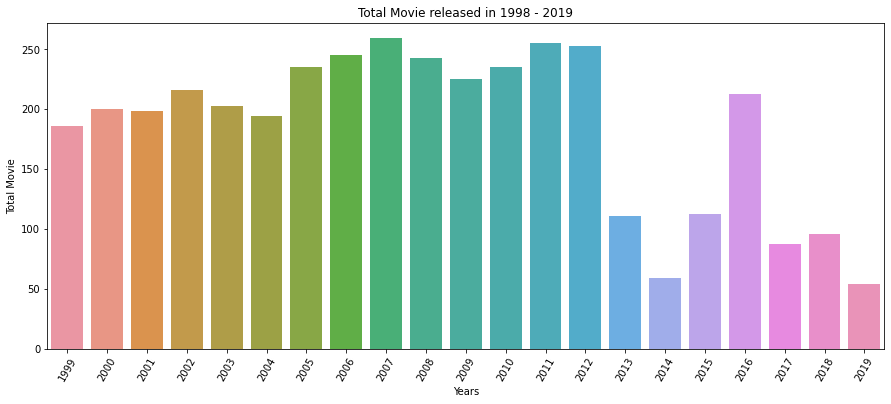

In [59]:
year2 = 1998
years2 = years[years.index > year2]

plt.figure(figsize=(15,6))
sb.barplot(y=years2, x=years2.index)
plt.title(f'Total Movie released in {year2} - 2019')
plt.xticks(rotation=60)
plt.xlabel('Years')
plt.ylabel('Total Movie')

In [60]:
df['genre_split'] = df['Genre'].apply(lambda x: x.split(","))
genre = []
for i in df['genre_split']:
    listgen = []
    for j in i:
        listgen.append(j.replace(" ",""))
    genre.append(listgen)
# genre = pd.Series(genre)

In [61]:
# genre[0]
df.head()
# print(df['genre_split'])

,index,Unnamed: 0,Title,Year,Rating,Metascore,Votes,Description,Genre,Runtime (Minutes),Revenue (Millions),Actors,Director,Its,Period,genre_split
0,0,0,Avengers: Endgame,2019,8.5,78.0,648248,After the devastating events of Avengers: ...,"Action, Adventure, Drama",181,858.37,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...","Anthony Russo, Joe Russo",Very Good,2019 <,"[Action, Adventure, Drama ]"
1,1,1,Spider-Man: Far from Home,2019,7.6,69.0,255849,Following the events of Avengers: Endgame ...,"Action, Adventure, Sci-Fi",129,388.53,"Tom Holland, Samuel L. Jackson, Jake Gyllenhaa...",Jon Watts,Good,2019 <,"[Action, Adventure, Sci-Fi ]"
2,2,2,Toy Story 4,2019,7.9,84.0,146740,"When a new toy called ""Forky"" joins Woody ...","Animation, Adventure, Comedy",100,433.03,"Tom Hanks, Tim Allen, Annie Potts, Tony Hale",Josh Cooley,Good,2019 <,"[Animation, Adventure, Comedy ]"
3,3,3,Jumanji: The Next Level,2019,7.0,58.0,63856,"In Jumanji: The Next Level, the gang is ba...","Action, Adventure, Comedy",123,0.00,"Dwayne Johnson, Jack Black, Kevin Hart, Karen ...",Jake Kasdan,Good,2019 <,"[Action, Adventure, Comedy ]"
4,4,4,The Lighthouse,2019,7.8,83.0,50595,Two lighthouse keepers try to maintain the...,"Drama, Fantasy, Horror",109,0.43,"Robert Pattinson, Willem Dafoe, Valeriia Karaman",Robert Eggers,Good,2019 <,"[Drama, Fantasy, Horror ]"


## Machine Learning

Berdasarkan judul, dengan 3 Parameter. Default
- Genre
- Its
- Period

In [62]:
abc = []
for i,v in enumerate(genre):
    c = ""
    c+=df['Period'][i]
    c+=", "
    c+=df['Its'][i]
    for j in v:
        c+=", "
        c+=j
    abc.append(c)
abc[0]

'2019 <, Very Good, Action, Adventure, Drama'

In [63]:
# Merubah parameter menjadi matrix
cv = CountVectorizer(tokenizer = lambda x: x.split(', '))
cm = cv.fit_transform(abc)

# total kata unik di kolom param
print(len(cv.get_feature_names()))
print(cv.get_feature_names())

# # matrix freq tiap kata di tiap data
print(cm.toarray())
# # print(cm.toarray()[0])

34
['2003-2007', '2007-2011', '2011-2015', '2015-2019', '2019 <', '< 2003', 'action', 'adventure', 'animation', 'bad', 'biography', 'comedy', 'crime', 'decent', 'documentary', 'drama', 'excellent', 'family', 'fantasy', 'good', 'history', 'horror', 'music', 'musical', 'mystery', 'news', 'poor', 'romance', 'sci-fi', 'sport', 'thriller', 'very good', 'war', 'western']
[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [64]:
cosScore = cosine_similarity(cm.toarray())
print(len(cosScore))

5735


In [65]:
sayasuka = "The Godfather: Part II"
indexsuka = df[df['Title'] == sayasuka].index.values[0]
indexsuka


5668

In [66]:
# sort berdasarkan %similarity
similarmovie = list(enumerate(cosScore[indexsuka]))
# print(similarmovie)
similarmovie = sorted(similarmovie, key=lambda x: x[1], reverse=True)
# print(similarmovie)

In [67]:
# 5 movie yang mirip

# similarmovie[:6]

dfSim = []
for i in similarmovie[:6]:
    dfSim.append(df.iloc[i[0]])
dfSim = pd.DataFrame(dfSim)
dfSim

,index,Unnamed: 0,Title,Year,Rating,Metascore,Votes,Description,Genre,Runtime (Minutes),Revenue (Millions),Actors,Director,Its,Period,genre_split
5668,5767,5218,The Godfather: Part II,1974,9.0,90.0,1052611,The early life and career of Vito Corleone...,"Crime, Drama",202,57.30,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",Francis Ford Coppola,Excellent,< 2003,"[Crime, Drama ]"
4347,4446,3897,The Shawshank Redemption,1994,9.3,80.0,2182098,Two imprisoned men bond over a number of y...,Drama,142,28.34,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Frank Darabont,Excellent,< 2003,[Drama ]
3085,3184,2635,Gangs of New York,2002,7.5,72.0,383889,"In 1862, Amsterdam Vallon returns to the F...","Crime, Drama",167,77.81,"Leonardo DiCaprio, Cameron Diaz, Daniel Day-Le...",Martin Scorsese,Good,< 2003,"[Crime, Drama ]"
3110,3209,2660,People I Know,2002,5.5,53.0,10767,A New York press agent must scramble when ...,"Crime, Drama",100,0.12,"Al Pacino, Téa Leoni, Ryan O'Neal, Kim Basinger",Daniel Algrant,Poor,< 2003,"[Crime, Drama ]"
3148,3247,2698,Sonny,2002,5.6,31.0,3885,An honorably discharged soldier returns ho...,"Crime, Drama",110,0.02,"James Franco, Brenda Blethyn, Mena Suvari, Har...",Nicolas Cage,Poor,< 2003,"[Crime, Drama ]"
3201,3300,2751,Sweet Sixteen,2002,7.4,86.0,12395,Determined to have a normal family life on...,"Crime, Drama",106,0.03,"Martin Compston, Michelle Coulter, Annmarie Fu...",Ken Loach,Good,< 2003,"[Crime, Drama ]"
